# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [2]:
# Basic package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Data 
udd = pd.read_csv('used_device_data.csv')
# Create a copy 
df = udd.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
# Examine data shape
print(f'There are {udd.shape[0]} rows and {udd.shape[1]} columns.')

There are 3454 rows and 15 columns.


In [4]:
# I want to a sample of 18 random rows .5% of the data
# using seed to keep the same 18 rows sample over everytime I want to see a new sample 
#Random sample of rows
np.random.seed(1)
udd.sample(18)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


In [5]:
udd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [6]:
# checking for missing values
udd.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [7]:
udd.duplicated(keep = False)

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

In [8]:
udd[udd['os'] == 'Others']['brand_name'].value_counts()

Nokia         39
Others        28
Samsung       15
Alcatel       12
BlackBerry    12
Celkon        11
Micromax       9
LG             6
Apple          3
ZTE            1
Acer           1
Name: brand_name, dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [13]:
udd.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3452.0,6.554229,6.970372,0.00,2.0000,5.000,8.000,32.00
int_memory,3450.0,54.573099,84.972371,0.01,16.0000,32.000,64.000,1024.00
ram,3450.0,4.036122,1.365105,0.02,4.0000,4.000,4.000,12.00
battery,3448.0,3133.402697,1299.682844,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3447.0,182.751871,88.413228,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20


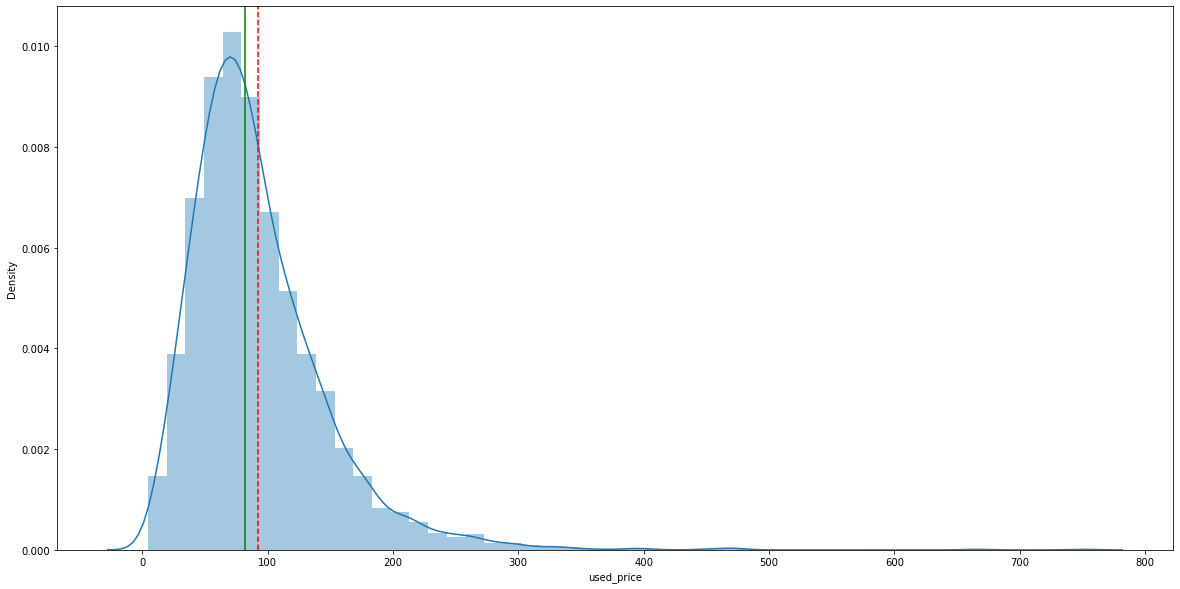

In [8]:
plt.figure(figsize=(20,10))
sns.distplot(udd.used_price);
plt.axvline(udd.used_price.mean(),
           color='red',
           ls='--')
plt.axvline(udd.used_price.median(),
           color='green',
           ls='-')

In [17]:
#Function to create a labeled barplot

def labeled_barplot(data, feature, perc=False, n=None):
    """ 
    Barplot with percentages at the top 
    
    data = dataframe
    feature = dataframe column
    perc = to display percentages instead of count (default = False)
    n: displays the top n category levels (default = None - displays all levels)
    """
    total = len(data[feature]) #length of the column 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count +1,5))
    else:
        plt.figure(figsize=(n +1, 5))
        
    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
            100 * p.get_height()/ total
            ) #gives % of the category
        else:
            label = p.get_height() #gives count of each level
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() 
        
        ax.annotate(
            label,
            (x,y),
            ha='center',
            va='center',
            size=12,
            xytext=(0,5),
            textcoords="offset points",
        )
        
    plt.show()
            

<Figure size 1440x720 with 0 Axes>

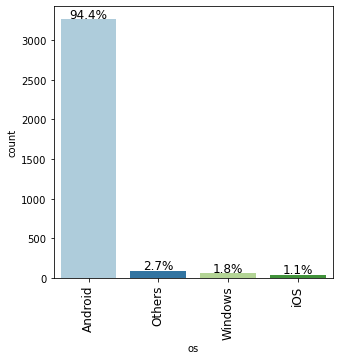

In [22]:
plt.figure(figsize= (20,10))
labeled_barplot(udd, 'os', perc=True)

<AxesSubplot:xlabel='ram', ylabel='brand_name'>

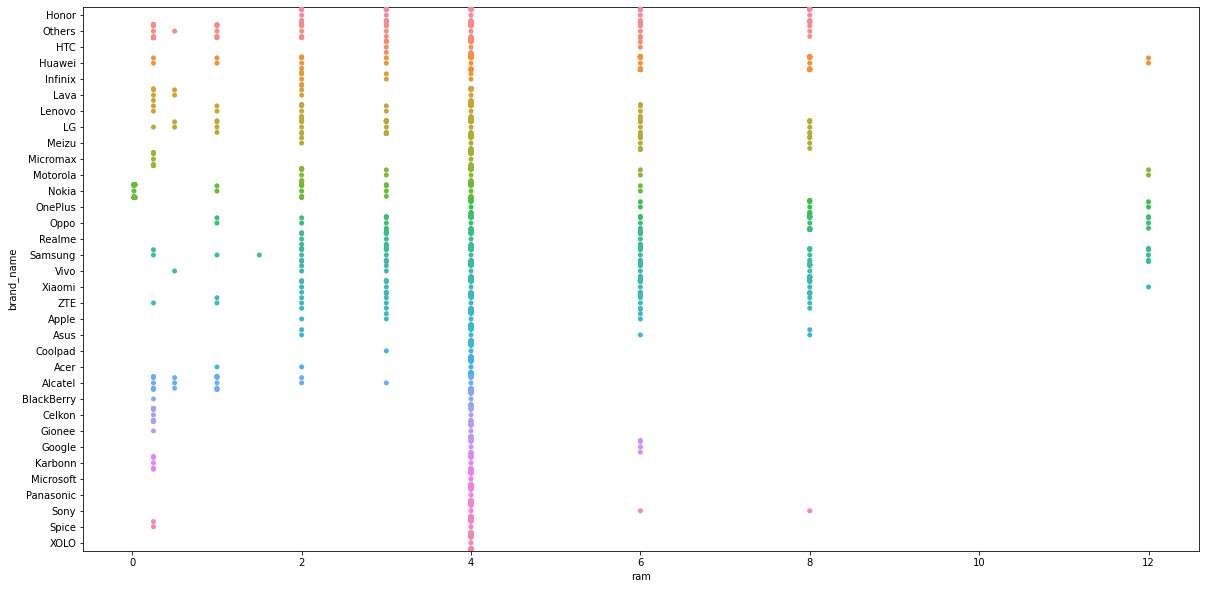

In [30]:
plt.figure(figsize= (20,10))
sns.swarmplot(data=udd, x = 'ram', y='brand_name', )

<Figure size 1440x720 with 0 Axes>

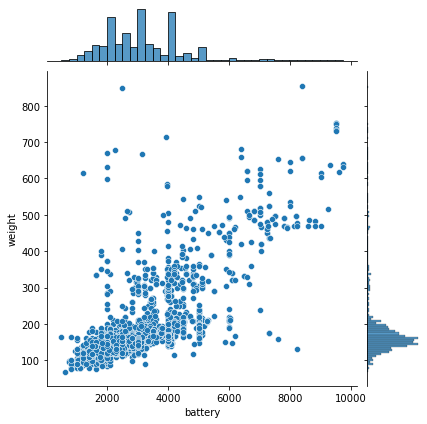

In [34]:
plt.figure(figsize= (20,10))
sns.jointplot(data =udd, x='battery', y='weight')

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
udd.loc[udd['brand_name']=='LG','os'] = 'Android'
udd.loc[udd['brand_name']=='Samsung', 'os'] = 'Android'
udd.loc[udd['brand_name']=='Apple', 'os'] = 'iOS'
udd.loc[udd['brand_name']=='Alcatel','os'] = 'Android'
udd.loc[udd['brand_name']=='Micromax','os'] = 'Android'

In [ ]:
udd[udd['os'] == 'Others']['brand_name'].value_counts()

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Linear Regression model

## Model performance evaluation

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Final Model Summary

## Actionable Insights and Recommendations

- 